# NFL GAME DAY ARREST

Rojan Khatri |
 DSC 530 |
 Bellevue University

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy.stats.stats import pearsonr
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
df = pd.read_csv('nflarrests.csv')
print(df.head())

   season  week_num day_of_week gametime_local home_team        away_team  \
0    2011         1      Sunday     1:15:00 PM   Arizona         Carolina   
1    2011         4      Sunday     1:05:00 PM   Arizona  New York Giants   
2    2011         7      Sunday     1:05:00 PM   Arizona       Pittsburgh   
3    2011         9      Sunday     2:15:00 PM   Arizona        St. Louis   
4    2011        13      Sunday     2:15:00 PM   Arizona           Dallas   

   home_score  away_score OT_flag  arrests  division_game  
0          28          21     NaN        5              0  
1          27          31     NaN        6              0  
2          20          32     NaN        9              0  
3          19          13      OT        6              1  
4          19          13      OT        3              0  


In [3]:
print(df.describe())

            season     week_num   home_score   away_score      arrests  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean   2013.000000     9.116302    23.934394    21.115308     6.305169   
std       1.406453     5.008986    10.442626     9.734006     9.408862   
min    2011.000000     1.000000     0.000000     0.000000     0.000000   
25%    2012.000000     5.000000    17.000000    14.000000     0.000000   
50%    2013.000000     9.000000    23.000000    20.000000     2.000000   
75%    2014.000000    14.000000    30.000000    27.000000     7.000000   
max    2015.000000    17.000000    59.000000    56.000000    69.000000   

       division_game  
count    1006.000000  
mean        0.375746  
std         0.484556  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


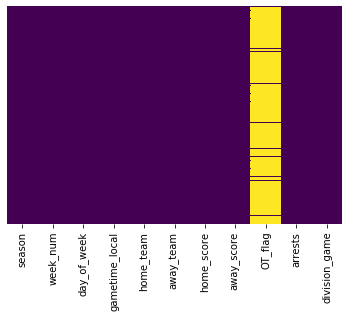

In [4]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

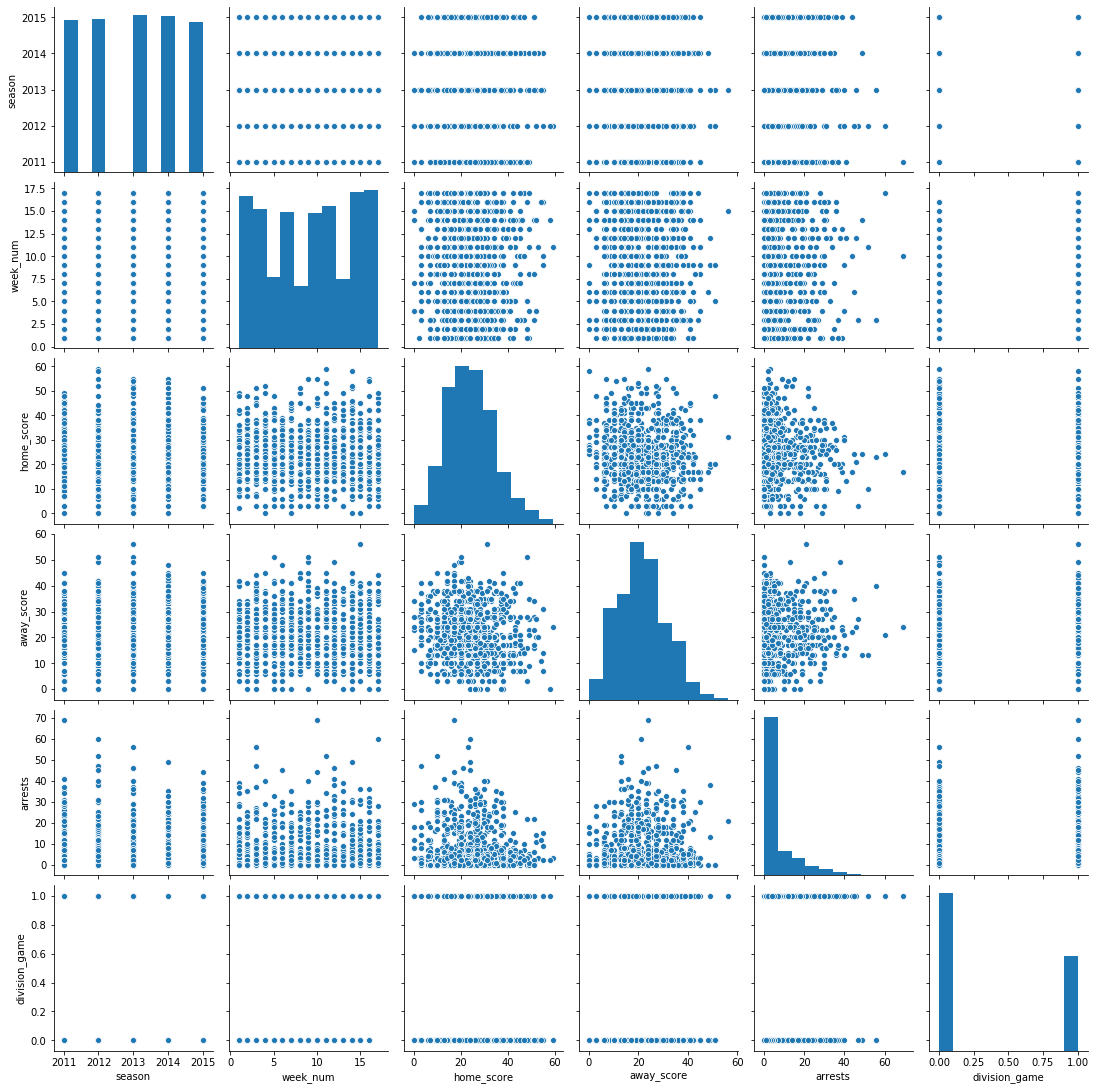

In [5]:
g=sns.pairplot(df)

In [6]:
divisional_df = df[(df.division_game == 1)]
divisional_total= divisional_df["arrests"].sum()
print(divisional_total)
nondivisional_df= df[(df.division_game == 0)]
nondivisional_total= nondivisional_df["arrests"].sum()
print(nondivisional_total)
print(df.arrests.sum())

2608
3735
6343


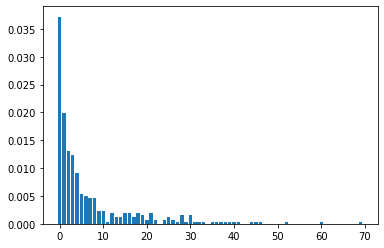

In [7]:
df1= divisional_df['arrests'].value_counts()
df2=pd.DataFrame(df1)
df2['item']=df2.index
df2['probability']=df2['arrests']/divisional_total
plt.bar(df2['item'], df2['probability'])
plt.show()




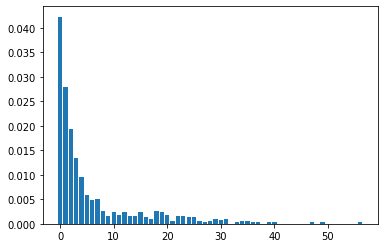

In [8]:
df1= nondivisional_df['arrests'].value_counts()
df2=pd.DataFrame(df1)
df2['item']=df2.index
df2['probability']=df2['arrests']/nondivisional_total
plt.bar(df2['item'], df2['probability'])
plt.show()

In [9]:
def ecdf(data):
    xaxis=np.sort(data)
    yaxis=np.arange(1,len(data)+1/len(data))
    return xaxis, yaxis



In [10]:
x,y=ecdf(df['arrests'])


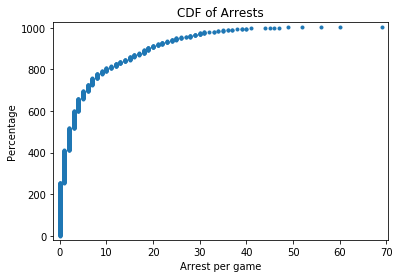

In [11]:
plt.plot(x,y, linestyle='none', marker='.')
plt.title('CDF of Arrests')
plt.xlabel('Arrest per game')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()

In [12]:
for ind, row in df.iterrows():
    df.loc[ind,"Difference"]= abs(row["home_score"]-row["away_score"])
df.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,Difference
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5,0,7.0
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6,0,4.0
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9,0,12.0
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6,1,6.0
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3,0,6.0


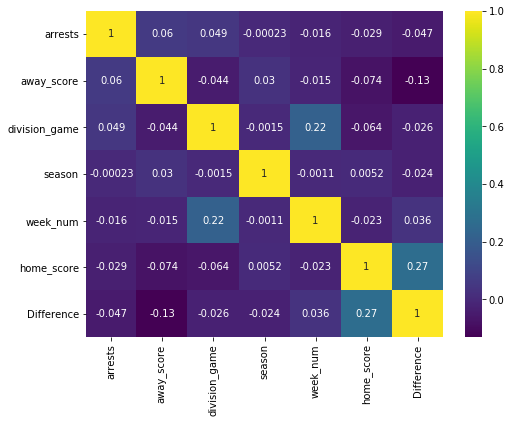

In [13]:
k = 12
cols = df.corr().nlargest(k, 'arrests')['arrests'].index
cm = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [14]:
corr =df.corr()
corr

,season,week_num,home_score,away_score,arrests,division_game,Difference
season,1.000000,-0.001130,0.005217,0.030162,-0.000226,-0.001460,-0.024324
week_num,-0.001130,1.000000,-0.022738,-0.014601,-0.015892,0.215244,0.036214
home_score,0.005217,-0.022738,1.000000,-0.073508,-0.029104,-0.063555,0.271468
away_score,0.030162,-0.014601,-0.073508,1.000000,0.060315,-0.043792,-0.130210
arrests,-0.000226,-0.015892,-0.029104,0.060315,1.000000,0.049029,-0.047058
division_game,-0.001460,0.215244,-0.063555,-0.043792,0.049029,1.000000,-0.026330
Difference,-0.024324,0.036214,0.271468,-0.130210,-0.047058,-0.026330,1.000000


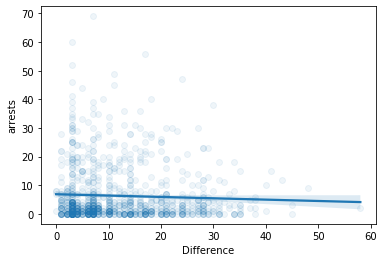

In [15]:
sns.regplot(x="Difference",y="arrests",data=df,
           scatter_kws={'alpha':0.07})

In [16]:
import scipy
from scipy.stats.stats import spearmanr

spearmanr_coefficient, p_value= spearmanr(df.Difference, df.arrests)
print('Spearman Rank Correlation Coefficient %0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.009


In [17]:
table=pd.crosstab(df.Difference, df.arrests)

from scipy.stats import chi2_contingency

chi2, p, dof, expected= chi2_contingency(table.values)

print ('Chi-square Statistics %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistics 1874.492 p_value 1.000


P-value is 1 which suggests that variables are independent of each other.
It proves null hypothesis and variables are not correllated.

In [18]:
diff=pd.DataFrame(df["Difference"])
arr=pd.DataFrame(df["arrests"])

In [19]:
regr = linear_model.LinearRegression()
regr.fit(diff,arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
regr.coef_

array([[-0.04727558]])

In [21]:
regr.score(diff,arr)

0.00221446833182648

In [22]:
regr.intercept_

array([6.86223138])